# Google Cloud Vision API
```python
$ pip install --upgrade google-api-python-client
$ pip install google-cloud-vision
```

[Google Cloud Vision API 사용하기](http://egloos.zum.com/mcchae/v/11342622)
```python
$ cp ~/Downloads/방금다운받은.json ~/aiffel/ocr_python/my_google_api_key.json  
$ echo "export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json" >> ~/.bashrc
```

In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

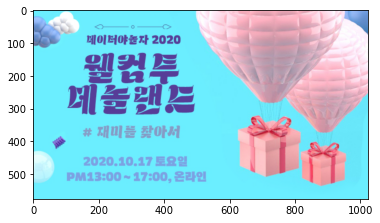

In [2]:
import matplotlib.pyplot as plt

# 입력 이미지 경로를 지정해 주세요.
path = '/home/aiffel0035/aiffel/ocr_python/test2.jpg'

test_img= plt.imread(path)
plt.imshow(test_img) # 흑백으로 보고 싶을 땐, plt.imshow(a, cmap='gray')

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-r--r-- 1 aiffel0035 aiffel0035 2335 10월 15 12:20 /home/aiffel0035/aiffel/ocr_python/my_google_api_key.json
Texts:

"페이터야눌자 2020
웰컴투
#재미뚤 찾아서
2020.10.17 토요일
PM13:00 ~ 17:00, 온라인
"

"페이터"

"야"

"눌자"

"2020"

"웰컴"

"투"

"#"

"재미"

"뚤"

"찾아서"

"2020.10.17"

"토요일"

"PM13"

":"

"00"

"~"

"17:00"

","

"온라인"
bounds: (432,492),(529,492),(529,523),(432,523)


# Keras-ocr

```python
$ pip install keras-ocr
```

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel0035/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0035/.keras-ocr/crnn_kurapan.h5


In [5]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_paths = [
        '/home/aiffel0035/aiffel/ocr_python/test2.jpg',
     '/home/aiffel0035/aiffel/ocr_python/test3.jpg'
    ]

images = [ keras_ocr.tools.read(path) for path in image_paths]

In [6]:
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

/home/aiffel0035/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


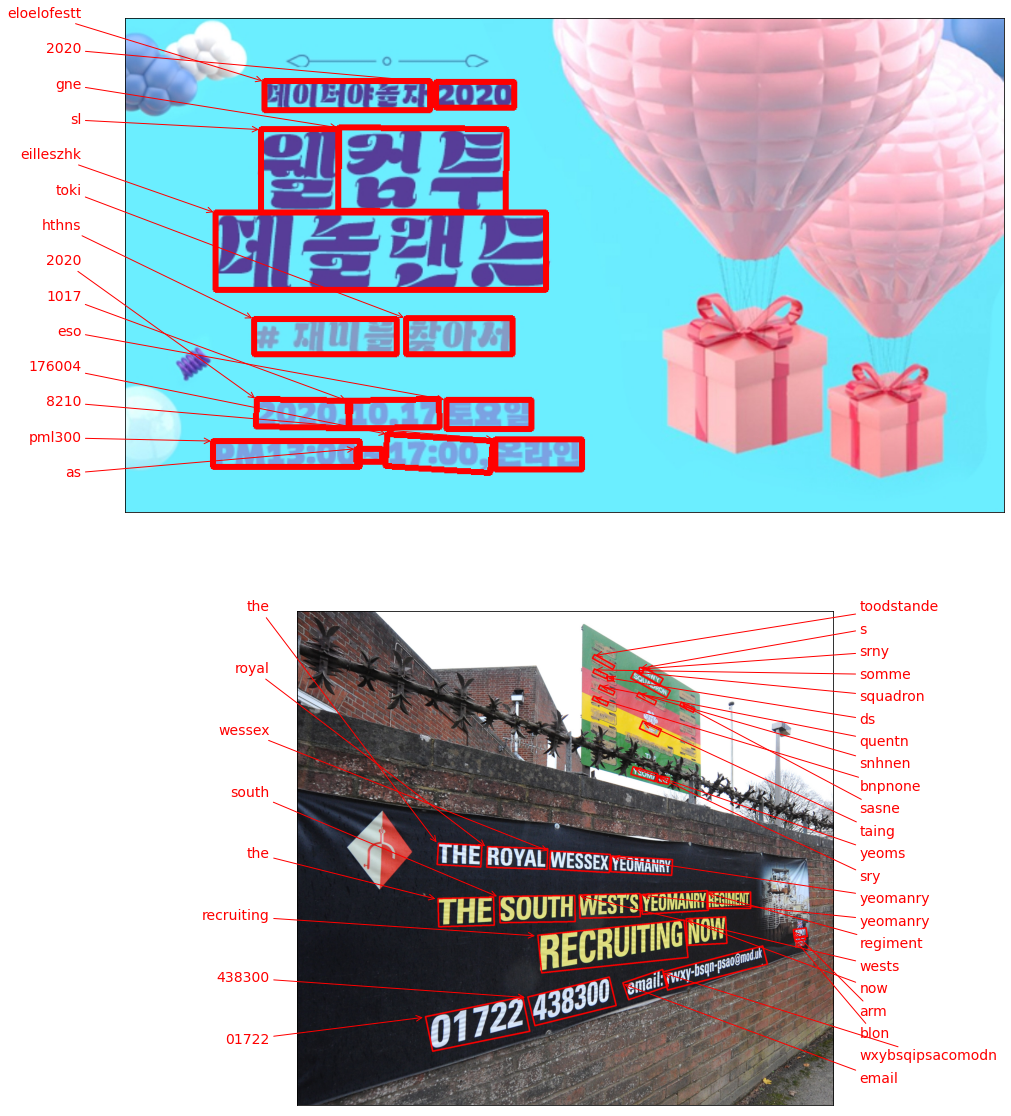

In [7]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract
```python
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
$ pip install pytesseract
$ sudo apt install tesseract-ocr-kor
```

In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/namecard6.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel0035/aiffel/ocr_python/0000.png
/home/aiffel0035/aiffel/ocr_python/0001.png
/home/aiffel0035/aiffel/ocr_python/0002.png
/home/aiffel0035/aiffel/ocr_python/0003.png
/home/aiffel0035/aiffel/ocr_python/0004.png
/home/aiffel0035/aiffel/ocr_python/0005.png
/home/aiffel0035/aiffel/ocr_python/0006.png
/home/aiffel0035/aiffel/ocr_python/0007.png
/home/aiffel0035/aiffel/ocr_python/0008.png
/home/aiffel0035/aiffel/ocr_python/0009.png
/home/aiffel0035/aiffel/ocr_python/0010.png
/home/aiffel0035/aiffel/ocr_python/0011.png
/home/aiffel0035/aiffel/ocr_python/0012.png
/home/aiffel0035/aiffel/ocr_python/0013.png
/home/aiffel0035/aiffel/ocr_python/0014.png
/home/aiffel0035/aiffel/ocr_python/0015.png
/home/aiffel0035/aiffel/ocr_python/0016.png
/home/aiffel0035/aiffel/ocr_python/0017.png
/home/aiffel0035/aiffel/ocr_python/0018.png
/home/aiffel0035/aiffel/ocr_python/0019.png
/home/aiffel0035/aiffel/ocr_python/0020.png
/home/aiffel0035/aiffel/ocr_python/0021.png
/home/aiffel0035/aiffel/ocr_pyth

In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    text_list=[]
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        text_list.append(recognized_data['text'])
    print("Done")
    return text_list

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Done


['DESIGN\n\x0c',
 'TAGLINE\n\x0c',
 'SPACE\n\x0c',
 '\x0c',
 '|\n\x0c',
 '\x0c',
 '|\n\x0c',
 'L1ORENM\n\x0c',
 'Dearne\n\x0c',
 '4 ‘ - on 3\n\x0c',
 'E\n\x0c',
 'YOUR\n\x0c',
 'NOME\n\x0c',
 'Graphic\n\x0c',
 'Designer\n\x0c',
 '1\n\x0c',
 'Dummy,\n\x0c',
 '| orem\n\x0c',
 'ipsum\n\x0c',
 'mele\n\x0c',
 'yay"\n\x0c',
 'hXKXKX\n\x0c',
 '9012\n\x0c',
 'Aone ie\n\x0c',
 'r=VeaFith\n\x0c',
 'space\n\x0c',
 'website\n\x0c',
 'qagdaress\n\x0c',
 'nere\n\x0c']

# Step1. 검증용 데이터셋
다양한 각도에서 찍은 명함, 일부가 가려진 명함 (손가락이 가림), 글자색과 배경색 대비가 크게 차이가 나지 않는 명함

In [10]:
import os
import glob
import os.path

In [11]:
folder = os.getenv('HOME') + ('/aiffel/ocr_python')
img_paths = glob.glob(folder + '/namecard*.*')
print(img_paths)

['/home/aiffel0035/aiffel/ocr_python/namecard4.png', '/home/aiffel0035/aiffel/ocr_python/namecard1.jpg', '/home/aiffel0035/aiffel/ocr_python/namecard3.jpg', '/home/aiffel0035/aiffel/ocr_python/namecard6.jpg', '/home/aiffel0035/aiffel/ocr_python/namecard7.jpg', '/home/aiffel0035/aiffel/ocr_python/namecard8.jpg', '/home/aiffel0035/aiffel/ocr_python/namecard5.jpg', '/home/aiffel0035/aiffel/ocr_python/namecard2.jpg']


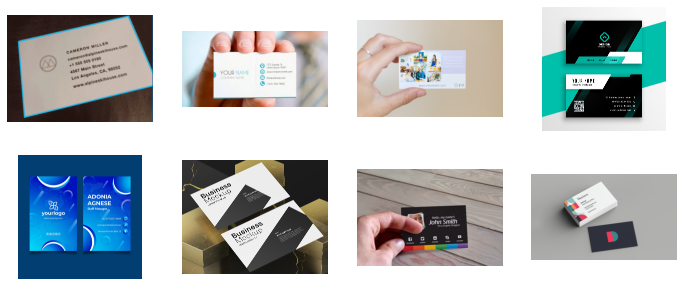

In [12]:
plt.figure(figsize=(12,5))

for idx, path in enumerate(img_paths):
    plt.subplot(2, 4, idx+1)
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')

# Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행


## Google Cloud Vision API

In [13]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    text_list = []
    vertice_list = []
    
    for text in texts:
        text_list.append(text.description)
        vertices = ([(vertex.x, vertex.y)
        for vertex in text.bounding_poly.vertices])
        vertice_list.append(vertices)
#        print('bounds: {}'.format(','.join(vertices)))
     
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return vertice_list, text_list

In [14]:
v, t  = detect_text(img_paths[0])

In [19]:
import matplotlib.patches as patches

def draw_box(left_bottom,left_top, right_bottom, right_top,ax):
    rect = patches.Rectangle((left_bottom,left_top),right_bottom-left_bottom,right_top-left_top, edgecolor='r', facecolor="none")
    ax.add_patch(rect)

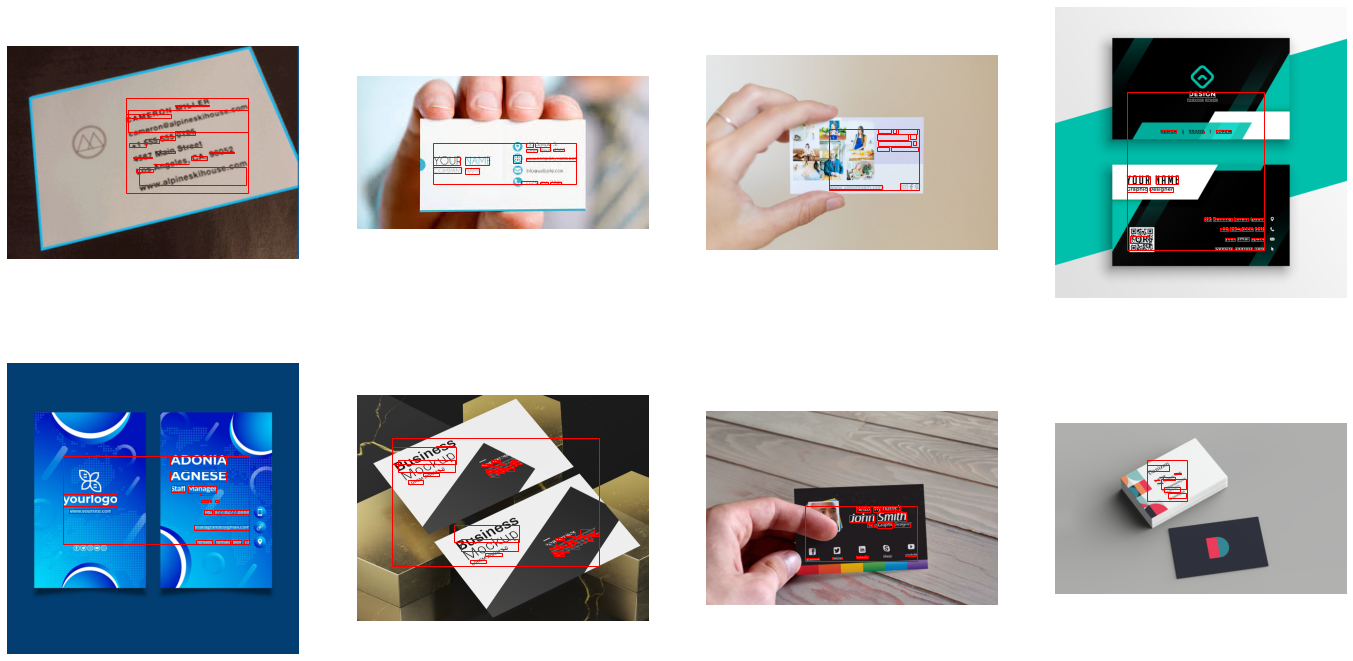

In [60]:
texts_list=[]
figure1 = plt.figure(figsize=(24,12))
for idx, path in enumerate(img_paths):
    vertices,texts = detect_text(path)
    texts_list.append(texts)
    ax = plt.subplot(2, 4, idx+1)
    img = plt.imread(path)    
    plt.imshow(img)
    plt.axis('off')
    for vertice in vertices:
        draw_box(vertice[0][0],vertice[0][1],vertice[2][0],vertice[2][1], ax)

In [41]:
for idx, text in enumerate(texts_list):
    print("\nName Card Number : " + str(idx+1))
    for i in text:
        print('\n"{}"'.format(i))


Name Card Number : 1

"CAMERON MILLER
cameron@alpineskihouse.com
+1 555 555 0185
4567 Main Street
Los Angeles, CA, 98052
www.alpineskihouse.com
"

"CAMERON"

"MILLER"

"cameron@alpineskihouse.com"

"+1"

"555"

"555"

"0185"

"4567"

"Main"

"Street"

"Los"

"Angeles,"

"CA,"

"98052"

"www.alpineskihouse.com"

Name Card Number : 2

"123 Sonole
loen n 45
O conponynanecon
YOUR NAME
COMANY NAME
129 46 70
"

"123"

"Sonole"

"loen"

"n"

"45"

"O"

"conponynanecon"

"YOUR"

"NAME"

"COMANY"

"NAME"

"129"

"46"

"70"

Name Card Number : 3

"Brand & Lifestyle
Photography for
Entrepreneurs &
Small Businesses
www.visionbalm.com
OfP
"

"Brand"

"&"

"Lifestyle"

"Photography"

"for"

"Entrepreneurs"

"&"

"Small"

"Businesses"

"www.visionbalm.com"

"OfP"

Name Card Number : 4

"DESIGN
TAGLINE SPACE
DESIGN | BRAND
LOREM
YOUR NAME
Graphic Designer
123 Dummy, Lorem Ipsum
+00 1234 5XXX 9012
OR
your email space
website address here
"

"DESIGN"

"TAGLINE"

"SPACE"

"DESIGN"

"|"

"BRAND"

"LOREM"

# keras-ocr

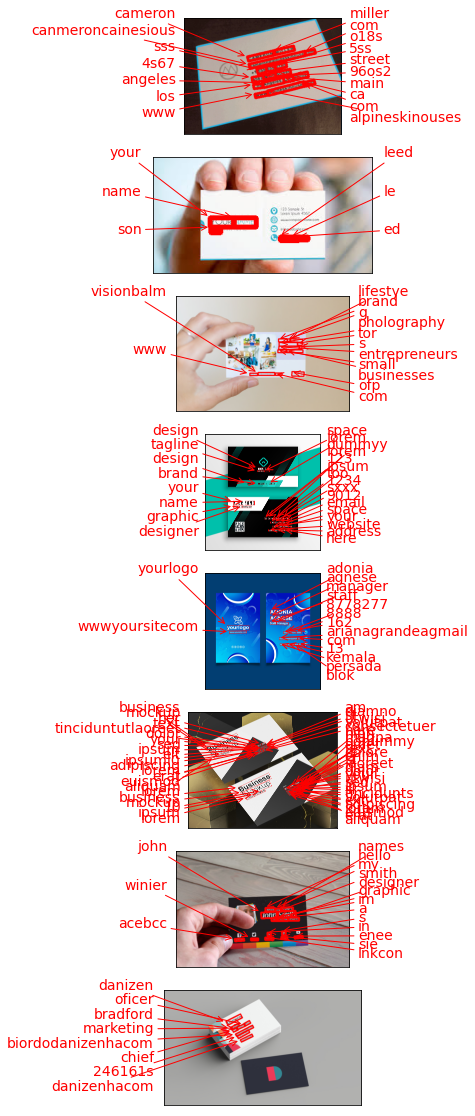

In [51]:
images = [ keras_ocr.tools.read(path) for path in img_paths]
prediction_groups = [pipeline.recognize([path]) for path in img_paths]
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract

In [57]:
def draw_tesseract(image_path,ax):
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            draw_box(left,top,width,height, ax)

In [53]:
tesseract_text=[]
for idx, img_file_path in enumerate(img_paths):
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    tesseract_text.append(recognize_images(cropped_image_path_list))

/home/aiffel0035/aiffel/ocr_python/0000.png
Done
/home/aiffel0035/aiffel/ocr_python/0000.png
/home/aiffel0035/aiffel/ocr_python/0001.png
Done
/home/aiffel0035/aiffel/ocr_python/0000.png
Done
/home/aiffel0035/aiffel/ocr_python/0000.png
/home/aiffel0035/aiffel/ocr_python/0001.png
/home/aiffel0035/aiffel/ocr_python/0002.png
/home/aiffel0035/aiffel/ocr_python/0003.png
/home/aiffel0035/aiffel/ocr_python/0004.png
/home/aiffel0035/aiffel/ocr_python/0005.png
/home/aiffel0035/aiffel/ocr_python/0006.png
/home/aiffel0035/aiffel/ocr_python/0007.png
/home/aiffel0035/aiffel/ocr_python/0008.png
/home/aiffel0035/aiffel/ocr_python/0009.png
/home/aiffel0035/aiffel/ocr_python/0010.png
/home/aiffel0035/aiffel/ocr_python/0011.png
/home/aiffel0035/aiffel/ocr_python/0012.png
/home/aiffel0035/aiffel/ocr_python/0013.png
/home/aiffel0035/aiffel/ocr_python/0014.png
/home/aiffel0035/aiffel/ocr_python/0015.png
/home/aiffel0035/aiffel/ocr_python/0016.png
/home/aiffel0035/aiffel/ocr_python/0017.png
/home/aiffel0035/

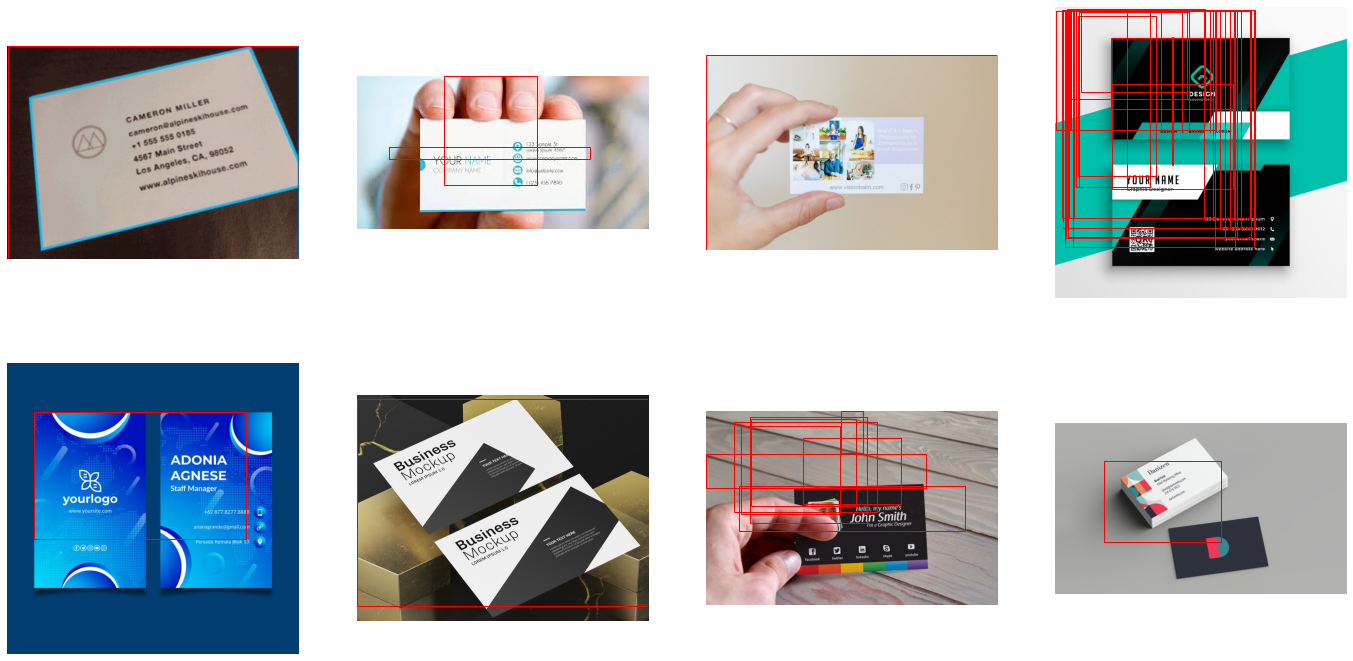

In [63]:
figure3 = plt.figure(figsize=(24,12))

for idx, path in enumerate(img_paths):
    ax = plt.subplot(2, 4, idx+1)
    img = plt.imread(path)    
    plt.imshow(img)
    plt.axis('off')
    draw_tesseract(path,ax)

In [72]:
for idx, text in enumerate(tesseract_text):
    print("\nName Card Number : " + str(idx+1))
    print(text)


Name Card Number : 1
[') ae\n\x0c']

Name Card Number : 2
['y\n\x0c', '.\n\x0c']

Name Card Number : 3
['\x0c']

Name Card Number : 4
['DESIGN\n\x0c', 'TAGLINE\n\x0c', 'SPACE\n\x0c', '\x0c', '|\n\x0c', '\x0c', '|\n\x0c', 'L1ORENM\n\x0c', 'Dearne\n\x0c', '4 ‘ - on 3\n\x0c', 'E\n\x0c', 'YOUR\n\x0c', 'NOME\n\x0c', 'Graphic\n\x0c', 'Designer\n\x0c', '1\n\x0c', 'Dummy,\n\x0c', '| orem\n\x0c', 'ipsum\n\x0c', 'mele\n\x0c', 'yay"\n\x0c', 'hXKXKX\n\x0c', '9012\n\x0c', 'Aone ie\n\x0c', 'r=VeaFith\n\x0c', 'space\n\x0c', 'website\n\x0c', 'qagdaress\n\x0c', 'nere\n\x0c']

Name Card Number : 5
['\x0c']

Name Card Number : 6
['* ag 2\n\x0c']

Name Card Number : 7
['————\n\x0c', 'Sy =<} omy\n\x0c', '_—\n\x0c', '‘ee\n\x0c', 'Ta OL Ae\n\x0c', 'eat\n\x0c', 'Smith\n\x0c', 'lm a Graphic Designer\n\x0c']

Name Card Number : 8
['\x0c']


# Step3. 테스트 결과 정리

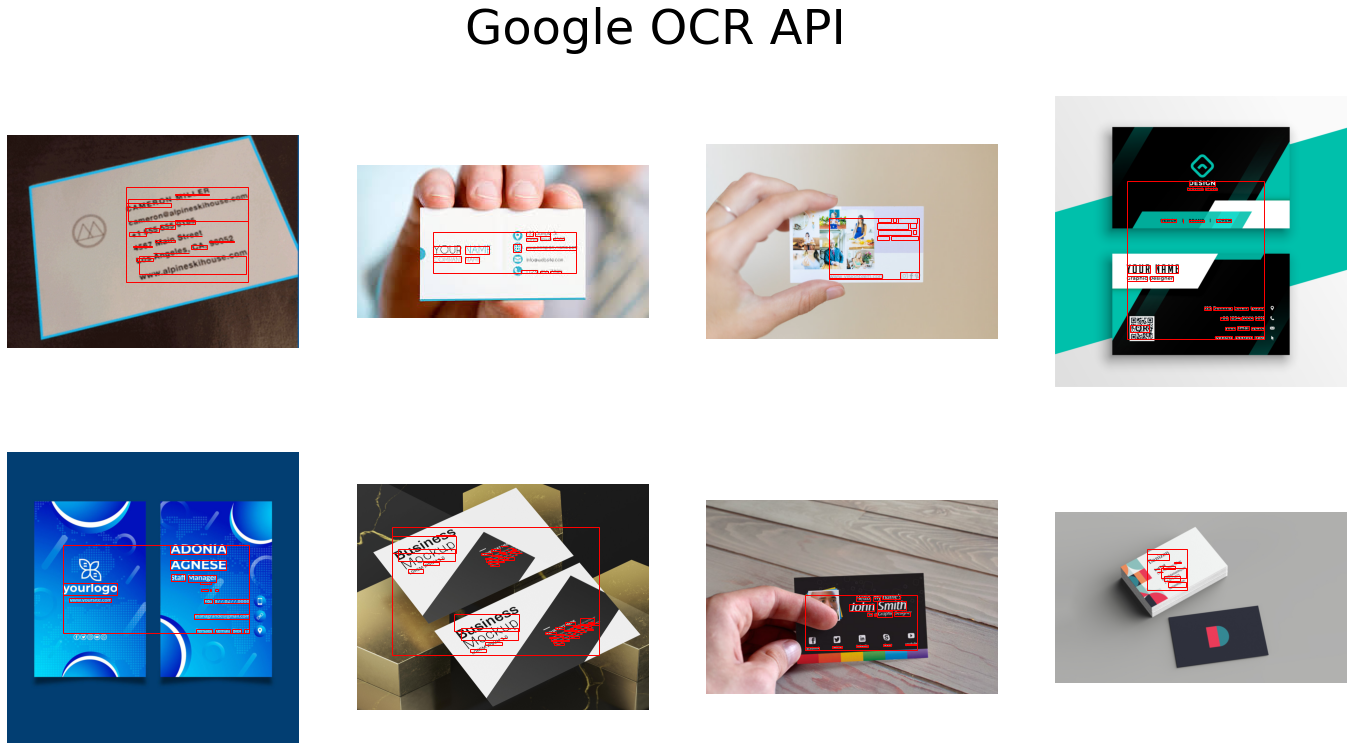

In [68]:
figure1.suptitle("Google OCR API", fontsize=48)
figure1

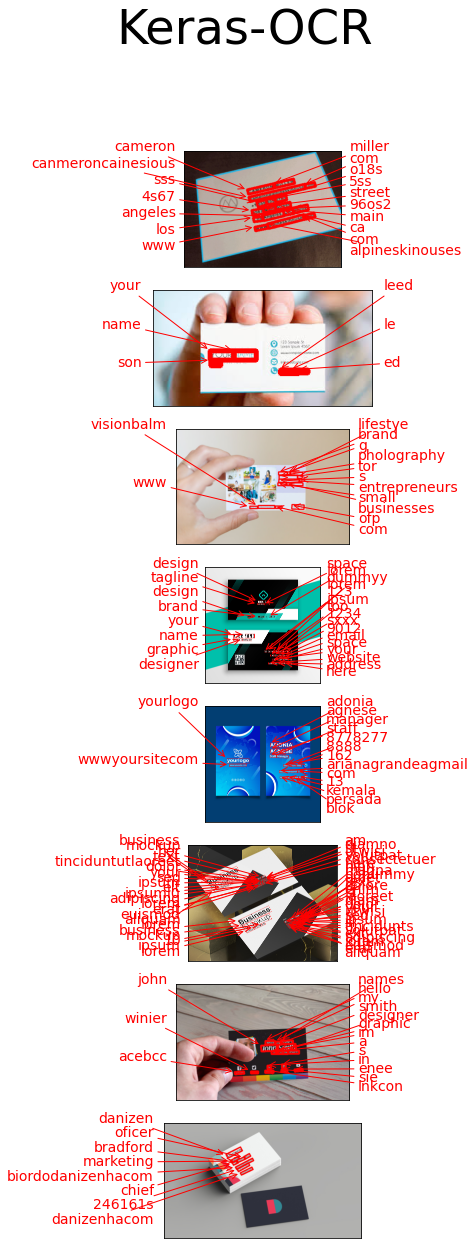

In [69]:
fig.suptitle("Keras-OCR", fontsize=48)
fig

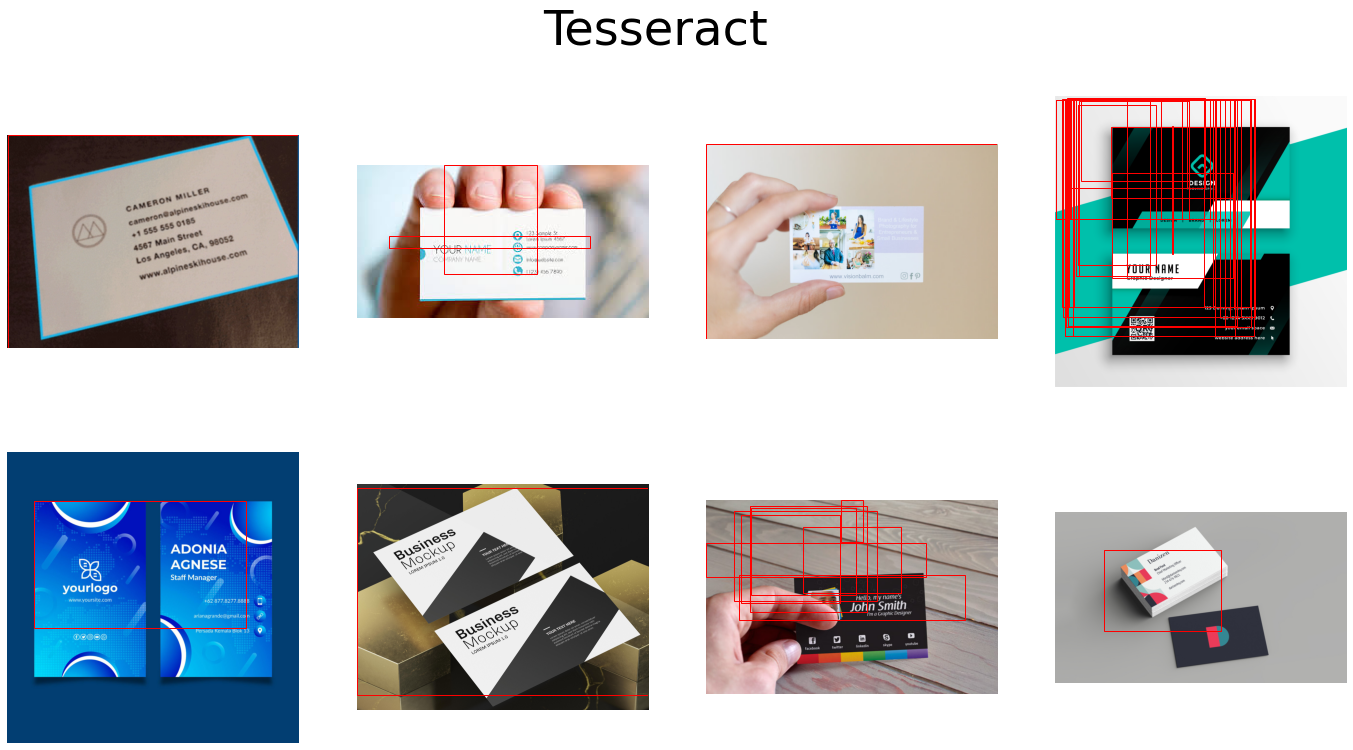

In [67]:
figure3.suptitle("Tesseract", fontsize=48)
figure3

# Step4. 결과 분석과 결론 제시
1. 텍스트 detection

- Detected text를 시각화한 bounding box를 보았을 때, Google OCR API 와 Keras-OCR 은 텍스트를 비슷하게 상당부분 detect 했다고 볼 수 있다.
- 그러나 두번째 명함(글자 해상도가 낮은지 흐리게 보이는 명함)에서는 Keras-OCR은 detect 하지 못한 영역이 꽤 있다.
- Visualization 과정에서 Google OCR API는 직사각형으로 표시를 하였고, Keras-OCR는 텍스트의 방향을 살린 box를 표현하였다. 이는 rectengle을 그리는 코드보다는, 4개의 vertices 점으로 도형을 그리는 코드를 짰으면 더욱 비교하기 좋았을 것이다.
- Tesseract는 텍스트를 상당 부분 제대로 디텍트하지 못한 것으로 보인다.

2. 텍스트 recognization

- 마지막 사진의 OCR 결과로 비교해보겠다.
![image](images/namecard2.jpg)


[Google OCR API]
```
Danizen
Brad Ford
Chief Marketing Officer
bford@danizenhq.com
234-676-9821
danizenhq.com
```

[Keras-OCR]
```
danizen
oficer
bradford
marketing
biordodanizenhacom
cheif
246161s
danizenhacom
```

[Tesseract]
```
NA
```

- Tesseract는 모델이 원래 성능이 저렇게 안 좋은지, 코드에 문제가 있는지 모르겠으나, 아무것도 recognize하지 못했다. Tesseract는 전반적으로 recognize를 못했다. 하지만, 글자와 배경색의 대비가 명확하고, 디지털 이미지로 되어 있어서 노이즈가 없는 4번째 이미지에 대한 성능은 높았다. 아무래도 실전에서 쓰기는 힘들 것 같다.
- 해당 명함의 정답은 다음과 같다
```
Danizen
Brad Ford
Cheif Marketing Officer
bford@danizenhq.com
234-676-9821
danizenhq.com
```
- 기울어진 디지털 명함 이미지에서는 Google OCR API 성능이 월등히 높았다. 100%의 정확도를 보였다. 

3. 결론
- 글자 해상도가 낮은 명함, 기울어진 명함에서 Google OCR API 의 text detection 및 reconization 성능이 더 좋은 것을 알 수 있다.